In [1]:
import zipfile
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
print (session.run(c))

[[22. 28.]
 [49. 64.]]


In [2]:
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras.callbacks import *
from keras.models import *
from keras.applications.densenet import DenseNet121
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [48]:
input_model = Input(shape=(32,32,3))

x = Conv2D(64,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(64,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(128,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(128,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(512,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(512,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_50 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_50 (Activation)   (None, 32, 32, 64)        0         
__________

In [3]:
import pickle

with open('/data/Quan/datasets/cifar10/train_set.hdf5', 'rb') as dt:
    train_set = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/validation_set.hdf5', 'rb') as dt:
    validation_set = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/test_set.hdf5', 'rb') as dt:
    test_set = pickle.load(dt)
    
train_images = train_set[0]
train_labels = train_set[1]

validation_images = validation_set[0]
validation_labels = validation_set[1]
    
test_images = test_set[0]
test_labels = test_set[1]

batch_size = 128

train_datagen = ImageDataGenerator(rotation_range=360,
                                   rescale=1./255,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_images, train_labels, batch_size = batch_size, shuffle=True)
validation_generator = test_datagen.flow(validation_images, validation_labels, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=1, shuffle=False)

In [50]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [ ]:
import pickle

epochs = 50

mcp = ModelCheckpoint('/data/Quan/datasets/tf_models/amazon_model.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/tf_models/amazon_history.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

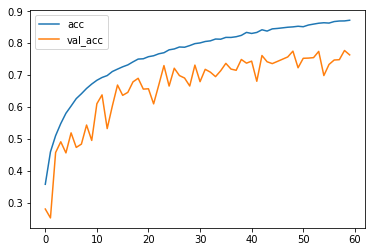

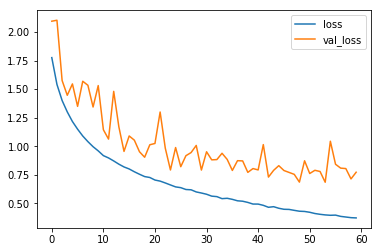

In [53]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
input_model = Input(shape=(32,32,3))

x = Conv2D(64,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(64,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(128,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(128,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(512,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(512,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

x = GlobalAveragePooling2D()(x)

x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

In [4]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

W1031 08:14:18.000089 140121624889088 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1031 08:14:18.001492 140121624889088 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1031 08:14:18.004891 140121624889088 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1031 08:14:18.022291 140121624889088 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1031 08:14:18.022799 1401216248

29089792/29084464 [==============================] - 568s 20us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
_________________________________________

In [30]:
indices = [4, 51, 139]

for i in indices:
    print(densenet.layers[i].name, densenet.layers[i].output_shape)

conv1/relu (None, 16, 16, 64)
pool2_conv (None, 8, 8, 128)
pool3_conv (None, 4, 4, 256)


In [38]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output])
pretrain.summary()

for layer in pretrain.layers:
    layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [39]:
input_model = Input(shape=(32,32,3))

b0,b1,b2 = pretrain(input_model)

x = Conv2D(64,(3,3), padding='same')(input_model)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(64,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

b0 = Conv2D(16, (1,1), padding='same')(b0)
b0 = BatchNormalization()(b0)
b0 = Activation('relu')(b0)

c0 = concatenate([b0, x])

x = Conv2D(128,(3,3), padding='same')(c0)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(128,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

b1 = Conv2D(32, (1,1), padding='same')(b1)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)

c1 = concatenate([b1, x])

x = Conv2D(512,(3,3), padding='same')(c1)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(512,(3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D(pool_size=(2,2))(x)

b2 = Conv2D(64, (1,1), padding='same')(b2)
b2 = BatchNormalization()(b2)
b2 = Activation('relu')(b2)

c2 = concatenate([b2, x])

x = GlobalAveragePooling2D()(c2)
x = Dropout(0.5)(x)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

W1031 09:15:23.845657 140121624889088 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 32, 32, 64)   1792        input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, 32, 32, 64)   256         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 32, 32, 64)   0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
model_7 (M

In [40]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [41]:
import pickle

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

Epoch 1/60
273/273 [==============================] - 17s 63ms/step - loss: 1.5720 - acc: 0.4523 - val_loss: 1.6298 - val_acc: 0.4473
Epoch 2/60
273/273 [==============================] - 13s 46ms/step - loss: 1.2992 - acc: 0.5626 - val_loss: 1.6047 - val_acc: 0.4537
Epoch 3/60
273/273 [==============================] - 12s 46ms/step - loss: 1.2049 - acc: 0.5917 - val_loss: 1.6524 - val_acc: 0.4054
Epoch 4/60
273/273 [==============================] - 12s 46ms/step - loss: 1.1380 - acc: 0.6116 - val_loss: 1.4997 - val_acc: 0.4537
Epoch 5/60
273/273 [==============================] - 12s 46ms/step - loss: 1.0925 - acc: 0.6275 - val_loss: 1.5170 - val_acc: 0.4723
Epoch 6/60
273/273 [==============================] - 12s 46ms/step - loss: 1.0444 - acc: 0.6438 - val_loss: 1.4048 - val_acc: 0.5067
Epoch 7/60
273/273 [==============================] - 12s 46ms/step - loss: 1.0093 - acc: 0.6528 - val_loss: 1.2744 - val_acc: 0.5556
Epoch 8/60
273/273 [==============================] - 12s 46ms

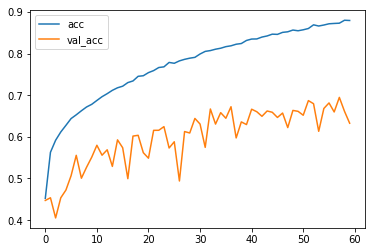

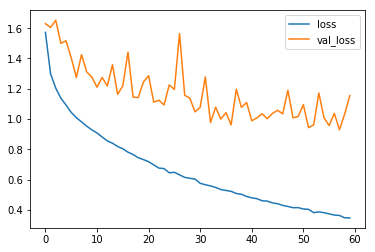

In [43]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [9]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

W1031 10:49:20.988755 139704156448512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1031 10:49:20.989597 139704156448512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1031 10:49:20.993230 139704156448512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1031 10:49:21.009349 139704156448512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1031 10:49:21.009808 1397041564

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [70]:
input_2 = Input(shape=(16,16,64))
t = densenet.layers[4](input_2)

In [69]:
densenet.layers[4].input

<tf.Tensor 'conv1/bn/cond/Merge:0' shape=(?, 16, 16, 64) dtype=float32>

In [10]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output, densenet.output])
pretrain.summary()

# for layer in pretrain.layers:
#     layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

conv5_block4_0_bn (BatchNormali (None, 1, 1, 608)    2432        conv5_block3_concat[0][0]        
__________________________________________________________________________________________________
conv5_block4_0_relu (Activation (None, 1, 1, 608)    0           conv5_block4_0_bn[0][0]          
__________________________________________________________________________________________________
conv5_block4_1_conv (Conv2D)    (None, 1, 1, 128)    77824       conv5_block4_0_relu[0][0]        
__________________________________________________________________________________________________
conv5_block4_1_bn (BatchNormali (None, 1, 1, 128)    512         conv5_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block4_1_relu (Activation (None, 1, 1, 128)    0           conv5_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_bloc

In [11]:
input_model = Input(shape=(32,32,3))

b0,b1,b2, outpretrain = pretrain(input_model)

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

# b0 = Conv2D(16, (1,1), padding='same')(b0)
# b0 = BatchNormalization()(b0)
# b0 = Activation('relu')(b0)

c0 = concatenate([b0, x0])

x1 = Conv2D(128,(3,3), padding='same')(c0)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

# b1 = Conv2D(32, (1,1), padding='same')(b1)
# b1 = BatchNormalization()(b1)
# b1 = Activation('relu')(b1)

b0_1 = Cropping2D(((4,4),(4,4)))(b0)
c1 = concatenate([b1, x1, b0_1])

x2 = Conv2D(512,(3,3), padding='same')(c1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

# b2 = Conv2D(64, (1,1), padding='same')(b2)
# b2 = BatchNormalization()(b2)
# b2 = Activation('relu')(b2)
b0_2 = Cropping2D(((6,6),(6,6)))(b0)
b1_2 = Cropping2D(((2,2),(2,2)))(b1)
c2 = concatenate([b2, x2, b0_2, b1_2])

gap_original = GlobalAveragePooling2D()(c2)
outpretrain = GlobalAveragePooling2D()(outpretrain)
concat = concatenate([gap_original, outpretrain])
x = Dropout(0.5)(concat)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

W1031 10:49:40.745813 139704156448512 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [12]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

W1031 10:49:40.862257 139704156448512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
import pickle

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_2.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_2.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

W1031 10:49:41.069572 139704156448512 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
273/273 [==============================] - 52s 192ms/step - loss: 1.4416 - acc: 0.5058 - val_loss: 2.0012 - val_acc: 0.3702
Epoch 2/60
273/273 [==============================] - 31s 114ms/step - loss: 1.1133 - acc: 0.6315 - val_loss: 1.6657 - val_acc: 0.4674
Epoch 3/60
273/273 [==============================] - 30s 109ms/step - loss: 0.9913 - acc: 0.6725 - val_loss: 1.0749 - val_acc: 0.6434
Epoch 4/60
273/273 [==============================] - 30s 109ms/step - loss: 0.9272 - acc: 0.6882 - val_loss: 1.0112 - val_acc: 0.6620
Epoch 5/60
273/273 [==============================] - 30s 109ms/step - loss: 0.8621 - acc: 0.7142 - val_loss: 1.3018 - val_acc: 0.5788
Epoch 6/60
273/273 [==============================] - 30s 109ms/step - loss: 0.8196 - acc: 0.7239 - val_loss: 1.1296 - val_acc: 0.6308
Epoch 7/60
273/273 [==============================] - 30s 109ms/step - loss: 0.7726 - acc: 0.7411 - val_loss: 0.9557 - val_acc: 0.6716
Epoch 8/60
273/273 [==============================] - 3

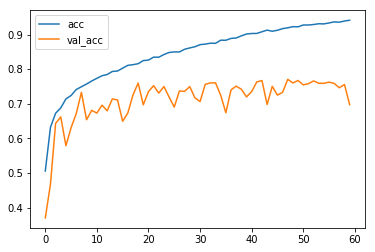

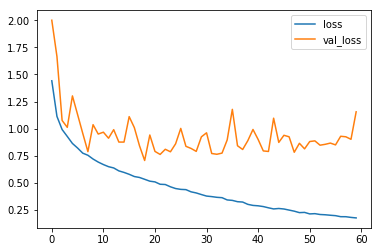

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
test_model = load_model('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_2.hdf5')
score = test_model.evaluate_generator(test_generator, steps=len(test_images),verbose=1)
score

10000/10000 [==============================] - 138s 14ms/step


[0.7752791717400205, 0.7724]

In [16]:
del(test_model)
test_generator.reset()
test_model = load_model('/data/Quan/datasets/cifar10/tf2_baseline_model.hdf5')
score = test_model.evaluate_generator(test_generator, steps=len(test_images),verbose=1)
score

10000/10000 [==============================] - 51s 5ms/step


[0.7194107112031344, 0.7789]

In [17]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [20]:
densenet.layers[139].output_shape

(None, 4, 4, 256)

In [21]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output, densenet.output])
pretrain.summary()

# for layer in pretrain.layers:
#     layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [23]:
from keras.regularizers import *

input_model = Input(shape=(32,32,3))

b0,b1,b2, outpretrain = pretrain(input_model)

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

b0 = Conv2D(64, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0)
b0 = BatchNormalization()(b0)
b0 = Activation('relu')(b0)

c0 = Add()([b0, x0])

x1 = Conv2D(128,(3,3), padding='same')(c0)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

b1 = Conv2D(128, (1,1), padding='same', kernel_regularizer=l2(0.01))(b1)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)

# b0_1 = Cropping2D(((4,4),(4,4)))(b0)
c1 = Add()([b1, x1])

x2 = Conv2D(512,(3,3), padding='same')(c1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

b2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b2)
b2 = BatchNormalization()(b2)
b2 = Activation('relu')(b2)
# b0_2 = Cropping2D(((6,6),(6,6)))(b0)
# b1_2 = Cropping2D(((2,2),(2,2)))(b1)
c2 = Add()([b2, x2])

gap_original = GlobalAveragePooling2D()(c2)
outpretrain = GlobalAveragePooling2D()(outpretrain)
concat = concatenate([gap_original, outpretrain])
x = Dropout(0.5)(concat)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_17 (BatchNo (None, 32, 32, 64)   256         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 32, 32, 64)   0           batch_normalization_17[0][0]     
__________________________________________________________________________________________________
model_3 (M

In [24]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [25]:
import pickle

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_3.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_3.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

Epoch 1/60
273/273 [==============================] - 61s 225ms/step - loss: 2.1516 - acc: 0.5314 - val_loss: 1.7964 - val_acc: 0.4730
Epoch 2/60
273/273 [==============================] - 31s 114ms/step - loss: 1.1263 - acc: 0.6358 - val_loss: 1.1651 - val_acc: 0.6125
Epoch 3/60
273/273 [==============================] - 31s 114ms/step - loss: 1.0120 - acc: 0.6688 - val_loss: 1.2978 - val_acc: 0.5955
Epoch 4/60
273/273 [==============================] - 31s 114ms/step - loss: 0.9267 - acc: 0.6974 - val_loss: 1.2661 - val_acc: 0.5961
Epoch 5/60
273/273 [==============================] - 31s 115ms/step - loss: 0.8732 - acc: 0.7124 - val_loss: 1.0520 - val_acc: 0.6560
Epoch 6/60
273/273 [==============================] - 31s 115ms/step - loss: 0.8301 - acc: 0.7262 - val_loss: 1.1828 - val_acc: 0.6206
Epoch 7/60
273/273 [==============================] - 31s 115ms/step - loss: 0.7911 - acc: 0.7385 - val_loss: 0.9100 - val_acc: 0.7023
Epoch 8/60
273/273 [==============================] - 3

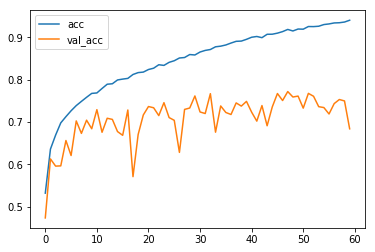

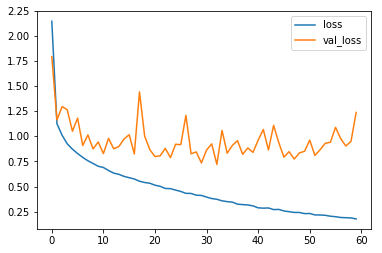

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [28]:
test_model = load_model('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_3.hdf5')

test_generator.reset()
score = test_model.evaluate_generator(test_generator, steps=len(test_images), verbose=1)
score

10000/10000 [==============================] - 214s 21ms/step


[0.778675673959157, 0.7697]

In [4]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

W1101 03:51:14.855718 139905630492416 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1101 03:51:14.856830 139905630492416 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1101 03:51:14.860449 139905630492416 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1101 03:51:14.876495 139905630492416 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1101 03:51:14.876917 1399056304

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [20]:
densenet.layers[139].output_shape

(None, 4, 4, 256)

In [5]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output, densenet.output])
pretrain.summary()

# for layer in pretrain.layers:
#     layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [8]:
from keras.regularizers import *

input_model = Input(shape=(32,32,3))

b0,b1,b2, outpretrain = pretrain(input_model)

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

b0 = Conv2D(64, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0)
b0 = BatchNormalization()(b0)
b0 = Activation('relu')(b0)

c0 = Add()([b0, x0])

x1 = Conv2D(128,(3,3), padding='same')(c0)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

b1 = Conv2D(128, (1,1), padding='same', kernel_regularizer=l2(0.01))(b1)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)

b0_1 = AveragePooling2D(pool_size=(2,2), strides=2)(b0)
b0_1 = Conv2D(128, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0_1)
b0_1 = BatchNormalization()(b0_1)
b0_1 = Activation('relu')(b0_1)

c1 = Add()([b1, x1, b0_1])

x2 = Conv2D(512,(3,3), padding='same')(c1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

b2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b2)
b2 = BatchNormalization()(b2)
b2 = Activation('relu')(b2)

b0_2 = AveragePooling2D(pool_size=(4,4), strides=4)(b0)
b0_2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0_2)
b0_2 = BatchNormalization()(b0_2)
b0_2 = Activation('relu')(b0_2)

b1_2 = AveragePooling2D(pool_size=(2,2), strides=2)(b1)
b1_2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b1_2)
b1_2 = BatchNormalization()(b1_2)
b1_2 = Activation('relu')(b1_2)

c2 = Add()([b2, x2, b0_2, b1_2])

gap_original = GlobalAveragePooling2D()(c2)
outpretrain = GlobalAveragePooling2D()(outpretrain)

outpretrain  =Dropout(0.5)(outpretrain)
outpretrain = Dense(512)(outpretrain)
outpretrain = BatchNormalization()(outpretrain)

concat = Add()([gap_original, outpretrain])
x = Dropout(0.5)(concat)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

W1101 03:55:28.920909 139905630492416 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 32, 32, 64)   256         conv2d_25[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 32, 32, 64)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
model_1 (M

In [10]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

W1101 03:55:49.808008 139905630492416 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
import pickle

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_4.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_4.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

W1101 03:55:50.579276 139905630492416 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
273/273 [==============================] - 59s 215ms/step - loss: 2.8688 - acc: 0.4976 - val_loss: 1.8645 - val_acc: 0.4330
Epoch 2/60
273/273 [==============================] - 32s 116ms/step - loss: 1.1905 - acc: 0.6251 - val_loss: 1.5958 - val_acc: 0.5114
Epoch 3/60
273/273 [==============================] - 30s 111ms/step - loss: 1.0596 - acc: 0.6619 - val_loss: 1.5799 - val_acc: 0.5247
Epoch 4/60
273/273 [==============================] - 31s 112ms/step - loss: 0.9762 - acc: 0.6901 - val_loss: 1.1287 - val_acc: 0.6384
Epoch 5/60
273/273 [==============================] - 30s 111ms/step - loss: 0.9130 - acc: 0.7095 - val_loss: 1.3345 - val_acc: 0.5873
Epoch 6/60
273/273 [==============================] - 30s 112ms/step - loss: 0.8704 - acc: 0.7205 - val_loss: 0.9104 - val_acc: 0.7003
Epoch 7/60
273/273 [==============================] - 30s 111ms/step - loss: 0.8344 - acc: 0.7320 - val_loss: 1.2956 - val_acc: 0.5795
Epoch 8/60
273/273 [==============================] - 3

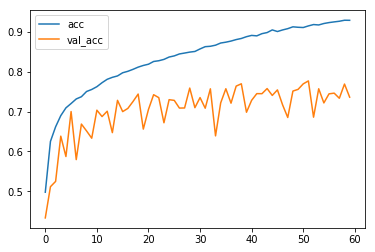

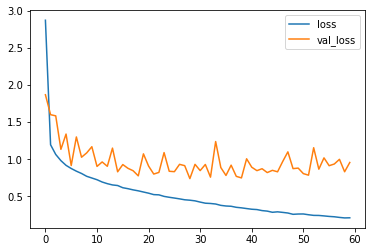

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
test_model = load_model('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_4.hdf5')

test_generator.reset()
score = test_model.evaluate_generator(test_generator, steps=len(test_images), verbose=1)
score

10000/10000 [==============================] - 156s 16ms/step


[0.7839214058029838, 0.7762]

In [15]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [20]:
densenet.layers[139].output_shape

(None, 4, 4, 256)

In [20]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output, densenet.output])
pretrain.summary()

for layer in pretrain.layers:
    layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [21]:
from keras.regularizers import *

input_model = Input(shape=(32,32,3))

b0,b1,b2, outpretrain = pretrain(input_model)

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

b0 = Conv2D(64, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0)
b0 = BatchNormalization()(b0)
b0 = Activation('relu')(b0)

b0_gap = GlobalAveragePooling2D()(b0)
x0_gap = GlobalAveragePooling2D()(x0)

c0_add = Add()([b0_gap, x0_gap])
c0_add = Dropout(0.3)(c0_add)
c0_add = Dense(64*16*16)(c0_add)
c0_add = Reshape((16,16,64))(c0_add)
c0_concat = concatenate([x0, c0_add])

x1 = Conv2D(128,(3,3), padding='same')(c0_concat)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

b1 = Conv2D(128, (1,1), padding='same', kernel_regularizer=l2(0.01))(b1)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)

b1_gap = GlobalAveragePooling2D()(b1)
x1_gap = GlobalAveragePooling2D()(x1)

c1_add = Add()([b1_gap, x1_gap])
c1_add = Dropout(0.3)(c1_add)
c1_add = Dense(128*8*8)(c1_add)
c1_add = Reshape((8,8,128))(c1_add)
c1_concat = concatenate([x1, c1_add])

x2 = Conv2D(512,(3,3), padding='same')(c1_concat)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

b2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b2)
b2 = BatchNormalization()(b2)
b2 = Activation('relu')(b2)

b2_gap = GlobalAveragePooling2D()(b2)
x2_gap = GlobalAveragePooling2D()(x2)

c2_add = Add()([b2_gap, x2_gap])
c2_add = Dropout(0.3)(c2_add)
c2_add = Dense(512*4*4)(c2_add)
c2_add = Reshape((4,4,512))(c2_add)
c2_concat = concatenate([x2, c2_add])

gap_original = GlobalAveragePooling2D()(c2_concat)
outpretrain = GlobalAveragePooling2D()(outpretrain)
concat = concatenate([gap_original, outpretrain])
x = Dropout(0.5)(concat)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 32, 32, 64)   1792        input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 32, 32, 64)   256         conv2d_55[0][0]                  
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 32, 32, 64)   0           batch_normalization_52[0][0]     
__________________________________________________________________________________________________
conv2d_56 

In [22]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [23]:
import pickle

train_generator.reset()
validation_generator.reset()

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_5.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_5.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

Epoch 1/60
273/273 [==============================] - 41s 149ms/step - loss: 2.2884 - acc: 0.4620 - val_loss: 2.0547 - val_acc: 0.3376
Epoch 2/60
273/273 [==============================] - 20s 75ms/step - loss: 1.4116 - acc: 0.5449 - val_loss: 1.8266 - val_acc: 0.4221
Epoch 3/60
273/273 [==============================] - 20s 75ms/step - loss: 1.3407 - acc: 0.5673 - val_loss: 1.8124 - val_acc: 0.3789
Epoch 4/60
273/273 [==============================] - 20s 75ms/step - loss: 1.2917 - acc: 0.5838 - val_loss: 1.7019 - val_acc: 0.4174
Epoch 5/60
273/273 [==============================] - 20s 75ms/step - loss: 1.2533 - acc: 0.5923 - val_loss: 1.5551 - val_acc: 0.4865
Epoch 6/60
273/273 [==============================] - 20s 75ms/step - loss: 1.2151 - acc: 0.6055 - val_loss: 1.5332 - val_acc: 0.5077
Epoch 7/60
273/273 [==============================] - 20s 75ms/step - loss: 1.1814 - acc: 0.6165 - val_loss: 1.3496 - val_acc: 0.5500
Epoch 8/60
273/273 [==============================] - 20s 75m

In [24]:
mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_5.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history_2 = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=40, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_5_2.hdf5', 'wb') as dt:
    pickle.dump(history_2.history, dt)

Epoch 1/40
273/273 [==============================] - 20s 75ms/step - loss: 0.4093 - acc: 0.8617 - val_loss: 0.7992 - val_acc: 0.7404
Epoch 2/40
273/273 [==============================] - 20s 75ms/step - loss: 0.4079 - acc: 0.8627 - val_loss: 0.7768 - val_acc: 0.7523
Epoch 3/40
273/273 [==============================] - 20s 75ms/step - loss: 0.3965 - acc: 0.8639 - val_loss: 0.8494 - val_acc: 0.7295
Epoch 4/40
273/273 [==============================] - 20s 75ms/step - loss: 0.3914 - acc: 0.8679 - val_loss: 0.8085 - val_acc: 0.7477
Epoch 5/40
273/273 [==============================] - 20s 75ms/step - loss: 0.3890 - acc: 0.8682 - val_loss: 0.7765 - val_acc: 0.7567
Epoch 6/40
273/273 [==============================] - 20s 75ms/step - loss: 0.3824 - acc: 0.8716 - val_loss: 0.8094 - val_acc: 0.7515
Epoch 7/40
273/273 [==============================] - 20s 75ms/step - loss: 0.3721 - acc: 0.8737 - val_loss: 0.8227 - val_acc: 0.7519
Epoch 8/40
273/273 [==============================] - 20s 75ms

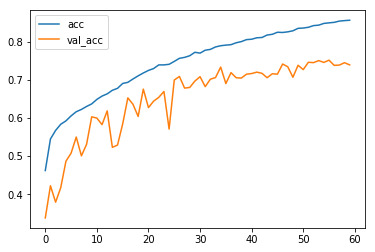

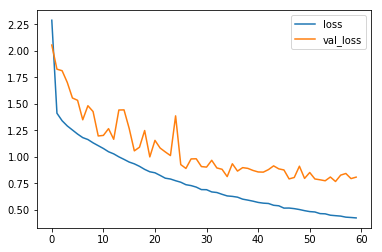

In [25]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

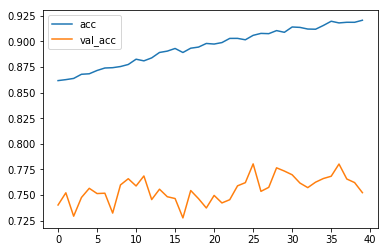

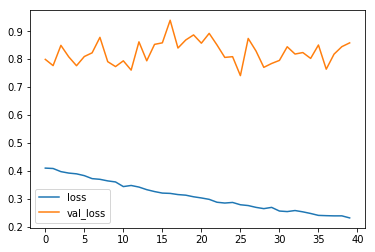

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history_2.history['acc'], label='acc')
plt.plot(history_2.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [27]:
test_model = load_model('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_5.hdf5')
test_generator.reset()
score = test_model.evaluate_generator(test_generator, steps=len(test_images), verbose=1)
score

10000/10000 [==============================] - 188s 19ms/step


[0.7468659084821585, 0.7785]

In [28]:
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(32,32,3), pooling=None)
densenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 38, 38, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [20]:
densenet.layers[139].output_shape

(None, 4, 4, 256)

In [29]:
pretrain = Model(inputs=densenet.input, outputs=[densenet.layers[4].output, densenet.layers[51].output, densenet.layers[139].output, densenet.output])
pretrain.summary()

# for layer in pretrain.layers:
#     layer.trainable = False

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 38, 38, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [30]:
from keras.regularizers import *

input_model = Input(shape=(32,32,3))

b0,b1,b2, outpretrain = pretrain(input_model)

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

b0 = Conv2D(64, (1,1), padding='same', kernel_regularizer=l2(0.01))(b0)
b0 = BatchNormalization()(b0)
b0 = Activation('relu')(b0)

b0_gap = GlobalAveragePooling2D()(b0)
x0_gap = GlobalAveragePooling2D()(x0)

c0_add = Add()([b0_gap, x0_gap])
c0_add = Dropout(0.3)(c0_add)
c0_add = Dense(64*16*16)(c0_add)
c0_add = Reshape((16,16,64))(c0_add)
c0_concat = concatenate([x0, c0_add])

x1 = Conv2D(128,(3,3), padding='same')(c0_concat)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

b1 = Conv2D(128, (1,1), padding='same', kernel_regularizer=l2(0.01))(b1)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)

b1_gap = GlobalAveragePooling2D()(b1)
x1_gap = GlobalAveragePooling2D()(x1)

c1_add = Add()([b1_gap, x1_gap])
c1_add = Dropout(0.3)(c1_add)
c1_add = Dense(128*8*8)(c1_add)
c1_add = Reshape((8,8,128))(c1_add)
c1_concat = concatenate([x1, c1_add])

x2 = Conv2D(512,(3,3), padding='same')(c1_concat)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

b2 = Conv2D(512, (1,1), padding='same', kernel_regularizer=l2(0.01))(b2)
b2 = BatchNormalization()(b2)
b2 = Activation('relu')(b2)

b2_gap = GlobalAveragePooling2D()(b2)
x2_gap = GlobalAveragePooling2D()(x2)

c2_add = Add()([b2_gap, x2_gap])
c2_add = Dropout(0.3)(c2_add)
c2_add = Dense(512*4*4)(c2_add)
c2_add = Reshape((4,4,512))(c2_add)
c2_concat = concatenate([x2, c2_add])

gap_original = GlobalAveragePooling2D()(c2_concat)
outpretrain = GlobalAveragePooling2D()(outpretrain)
concat = concatenate([gap_original, outpretrain])
x = Dropout(0.5)(concat)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 32, 32, 64)   1792        input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_62 (BatchNo (None, 32, 32, 64)   256         conv2d_64[0][0]                  
__________________________________________________________________________________________________
activation_61 (Activation)      (None, 32, 32, 64)   0           batch_normalization_62[0][0]     
__________________________________________________________________________________________________
conv2d_65 

In [31]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [32]:
import pickle

train_generator.reset()
validation_generator.reset()

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_dense_pretrain_model_6.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_dense_pretrain_history_6.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

Epoch 1/60
273/273 [==============================] - 71s 260ms/step - loss: 2.0984 - acc: 0.5244 - val_loss: 1.5068 - val_acc: 0.5247
Epoch 2/60
273/273 [==============================] - 34s 126ms/step - loss: 1.1218 - acc: 0.6371 - val_loss: 1.3217 - val_acc: 0.5697
Epoch 3/60
273/273 [==============================] - 34s 126ms/step - loss: 1.0026 - acc: 0.6707 - val_loss: 1.4221 - val_acc: 0.5567
Epoch 4/60
273/273 [==============================] - 35s 126ms/step - loss: 0.9280 - acc: 0.6961 - val_loss: 1.2597 - val_acc: 0.5887
Epoch 5/60
273/273 [==============================] - 34s 126ms/step - loss: 0.8623 - acc: 0.7118 - val_loss: 0.9468 - val_acc: 0.6837
Epoch 6/60
273/273 [==============================] - 34s 126ms/step - loss: 0.8139 - acc: 0.7297 - val_loss: 1.0942 - val_acc: 0.6370
Epoch 7/60
273/273 [==============================] - 34s 126ms/step - loss: 0.7797 - acc: 0.7402 - val_loss: 0.8697 - val_acc: 0.7045
Epoch 8/60
273/273 [==============================] - 3

In [33]:
from keras.regularizers import *

del(model)
input_model = Input(shape=(32,32,3))

x0 = Conv2D(64,(3,3), padding='same')(input_model)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = Conv2D(64,(3,3), padding='same')(x0)
x0 = BatchNormalization()(x0)
x0 = Activation('relu')(x0)

x0 = MaxPooling2D(pool_size=(2,2))(x0)

c0_add = GlobalAveragePooling2D()(x0)

c0_add = Dropout(0.3)(c0_add)
c0_add = Dense(64*16*16)(c0_add)
c0_add = Reshape((16,16,64))(c0_add)

c0_concat = concatenate([x0, c0_add])

x1 = Conv2D(128,(3,3), padding='same')(c0_concat)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = Conv2D(128,(3,3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)

x1 = MaxPooling2D(pool_size=(2,2))(x1)

c1_add = GlobalAveragePooling2D()(x1)

c1_add = Dropout(0.3)(c1_add)
c1_add = Dense(128*8*8)(c1_add)
c1_add = Reshape((8,8,128))(c1_add)
c1_concat = concatenate([x1, c1_add])

x2 = Conv2D(512,(3,3), padding='same')(c1_concat)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = Conv2D(512,(3,3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)

x2 = MaxPooling2D(pool_size=(2,2))(x2)

c2_add = GlobalAveragePooling2D()(x2)

c2_add = Dropout(0.3)(c2_add)
c2_add = Dense(512*4*4)(c2_add)
c2_add = Reshape((4,4,512))(c2_add)
c2_concat = concatenate([x2, c2_add])

gap_original = GlobalAveragePooling2D()(c2_concat)

x = Dropout(0.5)(gap_original)
x = Dense(10)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

model = Model(input_model, x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 32, 32, 64)   1792        input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, 32, 32, 64)   256         conv2d_73[0][0]                  
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 32, 32, 64)   0           batch_normalization_72[0][0]     
__________________________________________________________________________________________________
conv2d_74 

In [34]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [35]:
import pickle

train_generator.reset()
validation_generator.reset()

epochs = 60

mcp = ModelCheckpoint('/data/Quan/datasets/cifar10/tf2_baseline_model_2.hdf5', monitor='val_acc', 
                      save_best_only=True, save_weights_only=False)

start = time.time()
history = model.fit_generator(train_generator, steps_per_epoch=len(train_images)//batch_size, 
                            epochs=epochs, verbose=1, validation_data=validation_generator, 
                              validation_steps=len(validation_images)//batch_size, callbacks=[mcp])

exe_time = time.time() - start

print('exe time: ', exe_time)
with open('/data/Quan/datasets/cifar10/tf2_baseline_history_2.hdf5', 'wb') as dt:
    pickle.dump(history.history, dt)

Epoch 1/60
273/273 [==============================] - 35s 128ms/step - loss: 1.7340 - acc: 0.3698 - val_loss: 3.4652 - val_acc: 0.2388
Epoch 2/60
273/273 [==============================] - 15s 55ms/step - loss: 1.5107 - acc: 0.4679 - val_loss: 2.1436 - val_acc: 0.3164
Epoch 3/60
273/273 [==============================] - 15s 55ms/step - loss: 1.3773 - acc: 0.5176 - val_loss: 1.9818 - val_acc: 0.3782
Epoch 4/60
273/273 [==============================] - 15s 55ms/step - loss: 1.2820 - acc: 0.5520 - val_loss: 1.7642 - val_acc: 0.4039
Epoch 5/60
273/273 [==============================] - 15s 55ms/step - loss: 1.2092 - acc: 0.5796 - val_loss: 1.3368 - val_acc: 0.5380
Epoch 6/60
273/273 [==============================] - 15s 54ms/step - loss: 1.1372 - acc: 0.6075 - val_loss: 1.4932 - val_acc: 0.5013
Epoch 7/60
273/273 [==============================] - 15s 55ms/step - loss: 1.0941 - acc: 0.6223 - val_loss: 1.1893 - val_acc: 0.5831
Epoch 8/60
273/273 [==============================] - 15s 55m

In [36]:
test_model = load_model('/data/Quan/datasets/cifar10/tf2_baseline_model_2.hdf5')
test_generator.reset()
score = test_model.evaluate_generator(test_generator, steps=len(test_images), verbose=1)
score

10000/10000 [==============================] - 97s 10ms/step


[0.7309607723847908, 0.772]